## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur Engineering

so in the pt1 we did the data cleaning now we will do other steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import numpy as np

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('data/playstore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price in Dollars($),Content Rating,Genres,Current Ver,Android Ver,Last Updated Month,Last Updated Day,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,0,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,20,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  10840 non-null  object 
 1   Category             10840 non-null  object 
 2   Rating               9366 non-null   float64
 3   Reviews              10840 non-null  int64  
 4   Size                 9145 non-null   float64
 5   Installs             10840 non-null  int64  
 6   Type                 10840 non-null  int64  
 7   Price in Dollars($)  10840 non-null  float64
 8   Content Rating       10840 non-null  object 
 9   Genres               10840 non-null  object 
 10  Current Ver          10832 non-null  object 
 11  Android Ver          10838 non-null  object 
 12  Last Updated Month   10840 non-null  int64  
 13  Last Updated Day     10840 non-null  int64  
 14  Last Updated Year    10840 non-null  int64  
dtypes: float64(3), int64(6), object(6)
m

In [4]:
df.shape

(10840, 15)

In [5]:
df.duplicated('App').sum()

np.int64(1181)

In [6]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [7]:
df.duplicated('App').sum()

np.int64(0)

no more duplicated record

In [8]:
numreric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

#print columns
print("We have {} numerical features :\n{}\n".format(len(numreric_features),numreric_features))
print("We have {} categorical features :\n{}\n".format(len(categorical_features),categorical_features))

We have 9 numerical features :
['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price in Dollars($)', 'Last Updated Month', 'Last Updated Day', 'Last Updated Year']

We have 6 categorical features :
['App', 'Category', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']



## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [9]:
## Proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("----------------------------------------")

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTI

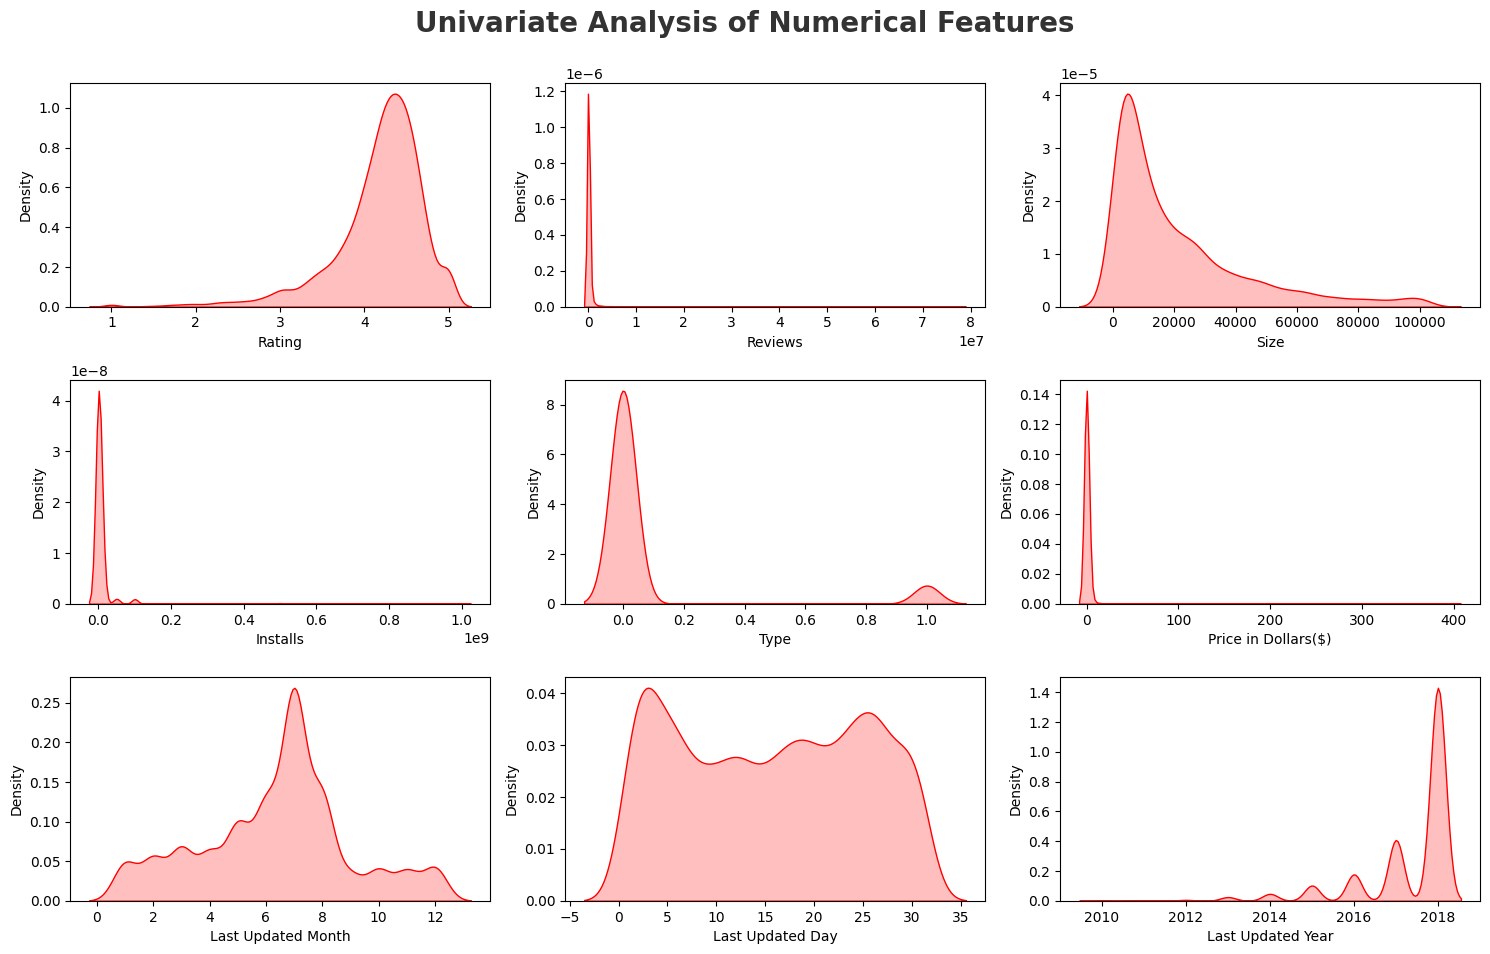

In [12]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.0)

for i in range(0,len(numreric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numreric_features[i]],shade=True,color='r')
    plt.xlabel(numreric_features[i])
    plt.tight_layout()

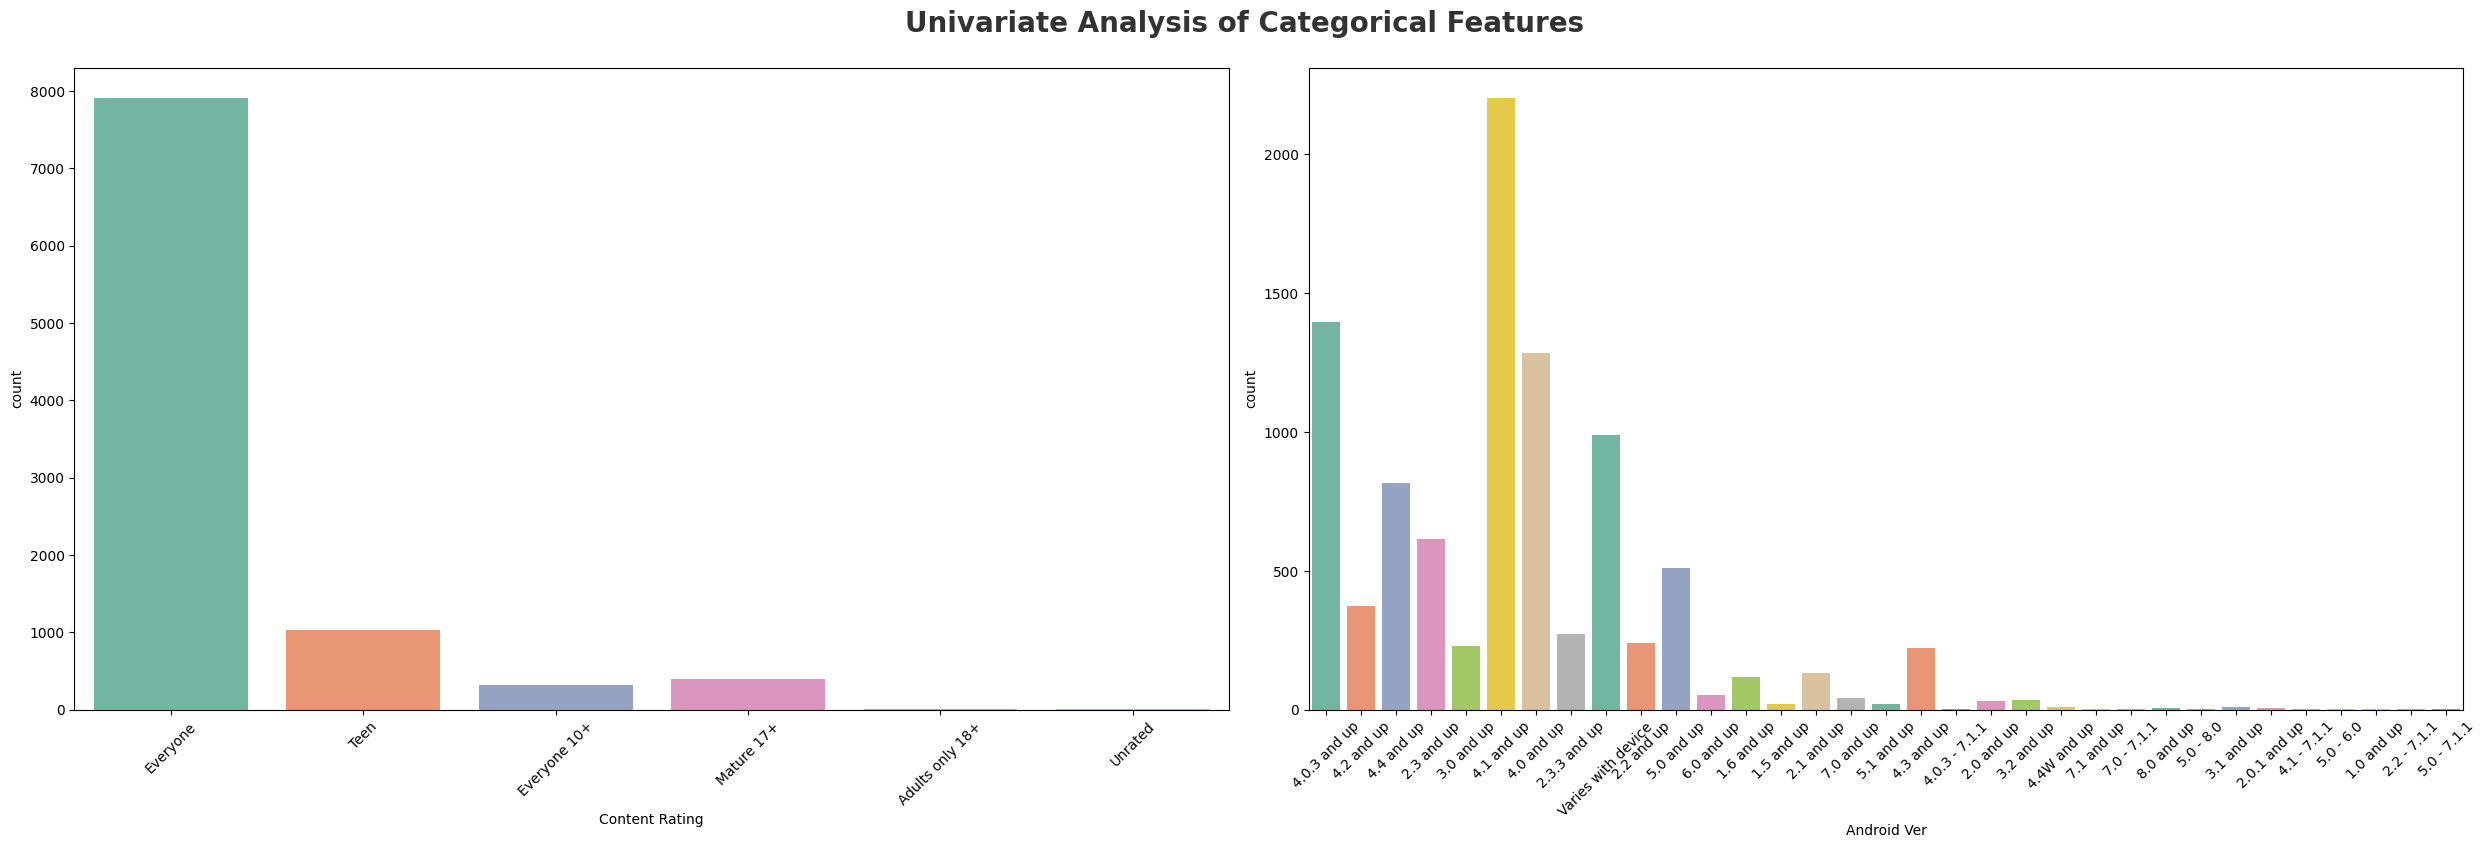

In [14]:
## Proportion of count data on categorical columns

plt.figure(figsize=(25,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)
cate_features=['Content Rating','Android Ver']

for i in range(0, len(cate_features)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df[cate_features[i]], palette='Set2')
    plt.xlabel(cate_features[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
    

which is most popular app category?

<Axes: ylabel='count'>

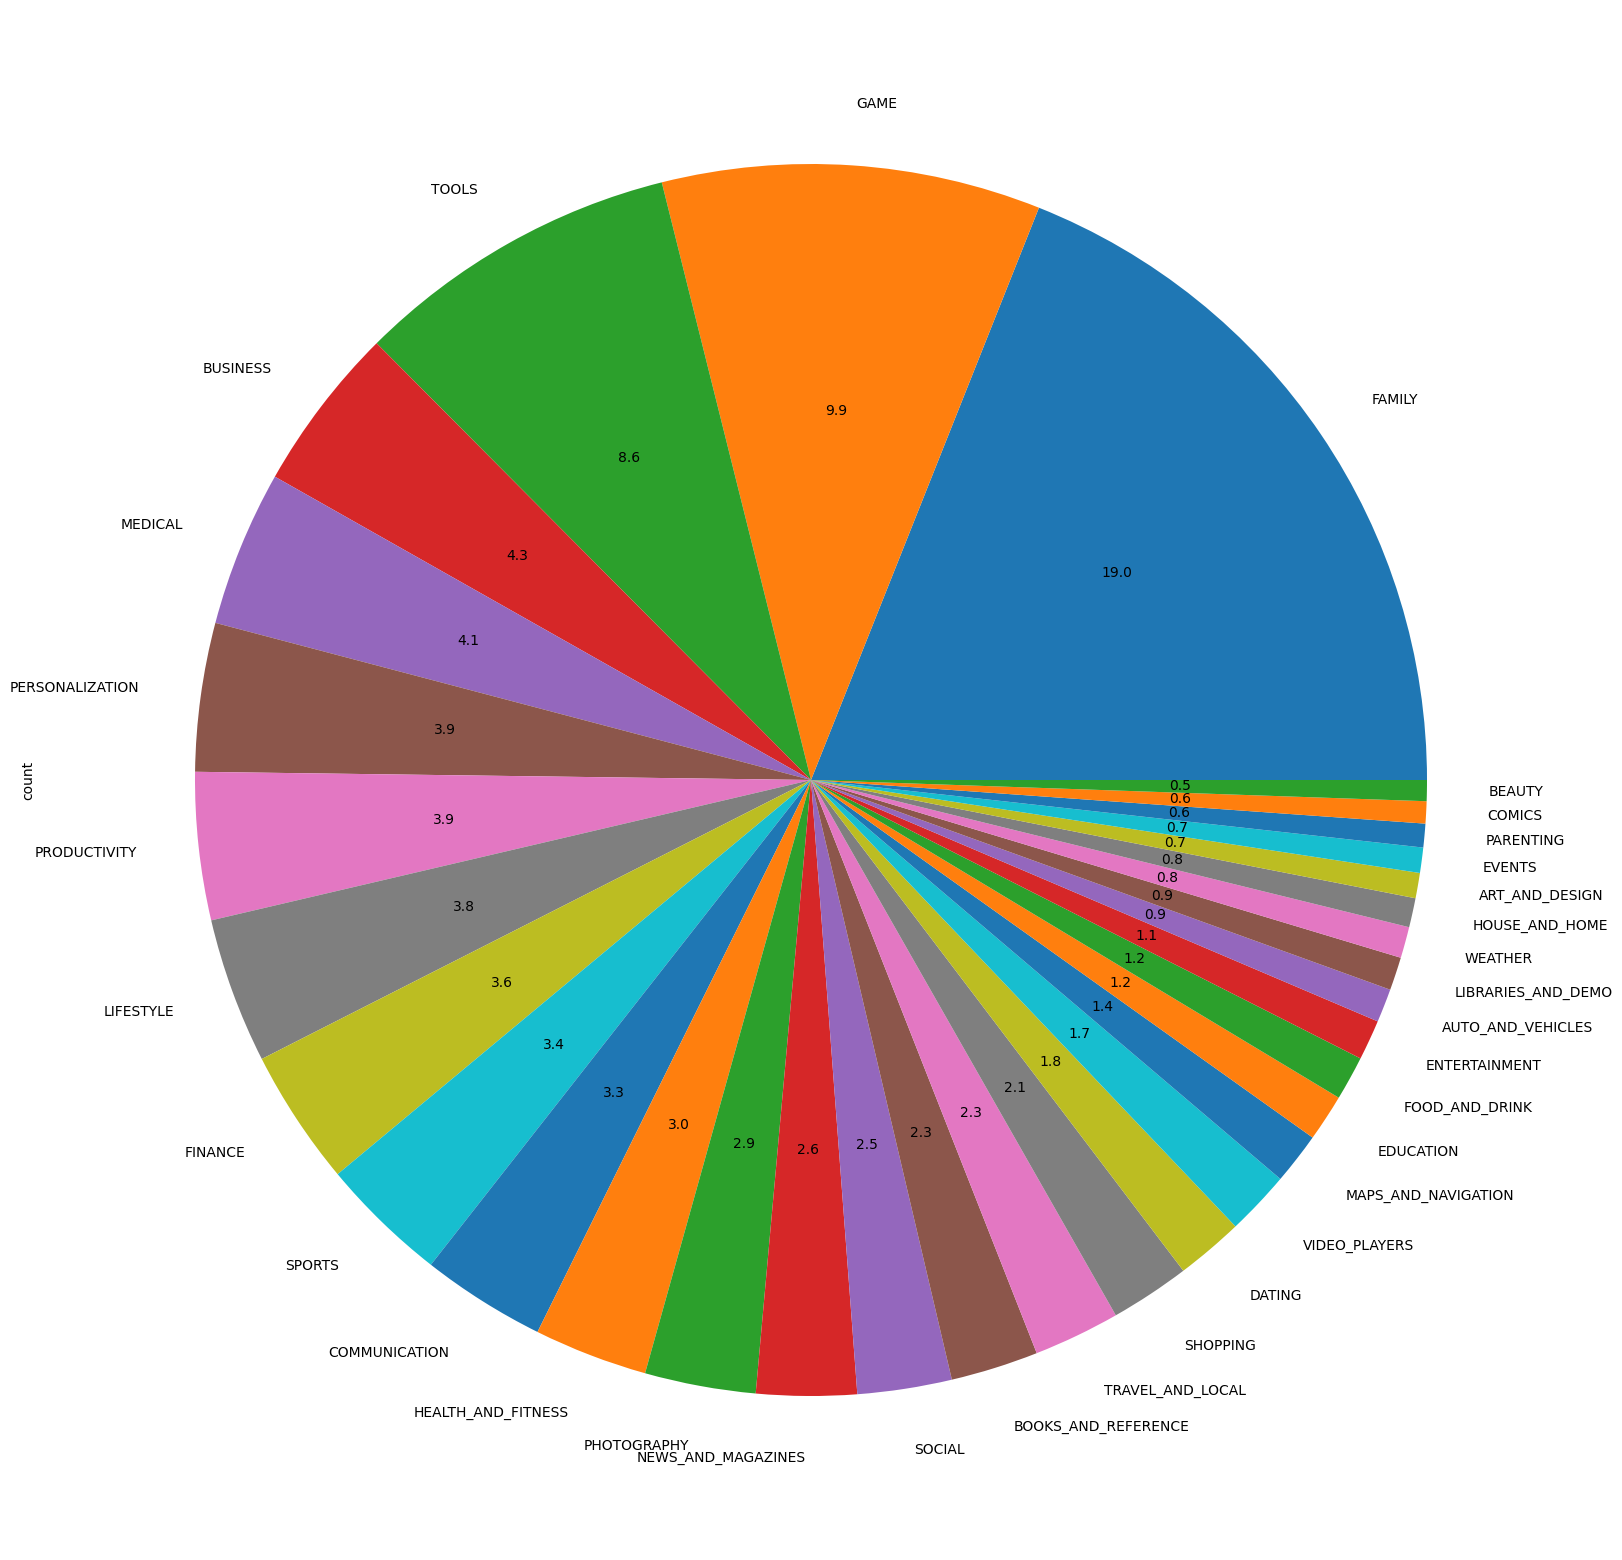

In [17]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(25,20),autopct='%1.1f')

### Observations
- There are more kinds of apps in playstores which are under category of family,games and tools
- Beauty,comics,arts and weather kinds of apps are very less in playstore

In [32]:
# Top 10 App Categories
top_10=pd.DataFrame(df['Category'].value_counts()[:10])
top_10

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


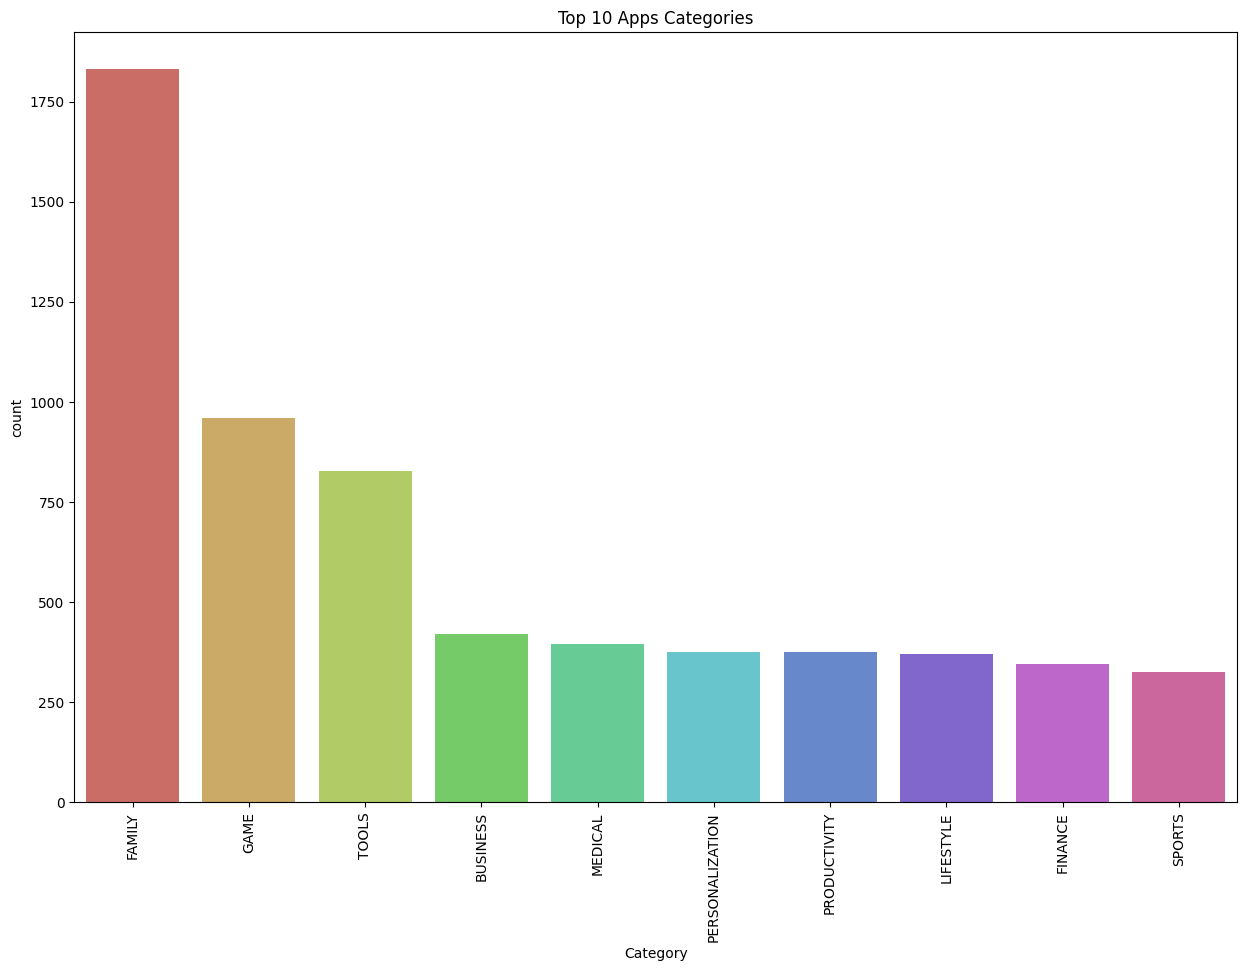

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x=top_10.index,y='count',data=top_10,palette='hls')
plt.title('Top 10 Apps Categories')
plt.xticks(rotation=90)
plt.show()

### Internal Assignments
- Which category has largest no of installations?
- What are the top 5 most installed apps in each category
- How many apps are there in the google store with 5 rating?


In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price in Dollars($),Content Rating,Genres,Current Ver,Android Ver,Last Updated Month,Last Updated Day,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,0,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,20,2018


In [41]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

##### game category has the most installs with 13.8 billion installs

In [50]:
top_5=df.groupby('Category').apply(lambda x: x.nlargest(5, 'Installs'))
top_5

App  \
Category                                                                 
ART_AND_DESIGN 3                                 Sketch - Draw & Paint   
               12                       Tattoo Name On My Photo Editor   
               19                                         ibis Paint X   
               42                           Textgram - write on photos   
               45    Canva: Poster, banner, card maker & graphic de...   
...                                                                ...   
WEATHER        3626  The Weather Channel: Rain Forecast & Storm Alerts   
               3628  AccuWeather: Daily Forecast & Live Weather Rep...   
               3649   GO Weather - Widget, Theme, Wallpaper, Efficient   
               4725                 Weather & Clock Widget for Android   
               3630    Weather by WeatherBug: Forecast, Radar & Alerts   

                           Category  Rating  Reviews     Size  Installs  Type  \
Category                                                                        
ART_AND_DESIGN 3     ART_AND_DESIGN     4.5   215644  25600.0  50000000     0   
               12    ART_AND_DESIGN     4.2    44829  20480.0  10000000     0   
               19    ART_AND_DESIGN     4.6   224399  31744.0  10000000     0   
               42    ART_AND_DESIGN     4.4   295221      NaN  10000000     0   
               45    ART_AND_DESIGN     4.7   174531  24576.0  10000000     0   
...                             ...     ...      ...      ...       ...   ...   
WEATHER        3626         WEATHER     4.4  1558437      NaN  50000000     0   
               3628         WEATHER     4.4  2053404      NaN  50000000     0   
               3649         WEATHER     4.5  1422858      NaN  50000000     0   
               4725         WEATHER     4.4  2371543  11264.0  50000000     0   
               3630         WEATHER     4.5   981995      NaN  10000000     0   

                     Price in Dollars($) Content Rating        Genres  \
Category                                                                
ART_AND_DESIGN 3                     0.0           Teen  Art & Design   
               12                    0.0           Teen  Art & Design   
               19                    0.0       Everyone  Art & Design   
               42                    0.0       Everyone  Art & Design   
               45                    0.0       Everyone  Art & Design   
...                                  ...            ...           ...   
WEATHER        3626                  0.0       Everyone       Weather   
               3628                  0.0       Everyone       Weather   
               3649                  0.0       Everyone       Weather   
               4725                  0.0       Everyone       Weather   
               3630                  0.0       Everyone       Weather   

                            Current Ver         Android Ver  \
Category                                                      
ART_AND_DESIGN 3     Varies with device          4.2 and up   
               12                   3.8          4.1 and up   
               19                 5.5.4          4.1 and up   
               42    Varies with device  Varies with device   
               45                 1.6.1          4.1 and up   
...                                 ...                 ...   
WEATHER        3626  Varies with device  Varies with device   
               3628  Varies with device  Varies with device   
               3649  Varies with device  Varies with device   
               4725             5.9.4.0        4.0.3 and up   
               3630  Varies with device  Varies with device   

                     Last Updated Month  Last Updated Day  Last Updated Year  
Category                                                                      
ART_AND_DESIGN 3                      6                 8               2018  
               12                     4    

No of Apps with rating 5

In [54]:
Apps_rated_5=df.loc[df['Rating']==5.0].shape[0]
print(f'The are {Apps_rated_5} Apps in the google playstore that have 5 rating')

The are 271 Apps in the google playstore that have 5 rating
